Una imagen HDR (High Dynamic Range) combina varias fotos del mismo lugar con diferentes exposiciones para crear una imagen que conserva los detalles tanto en sombras como en luces.

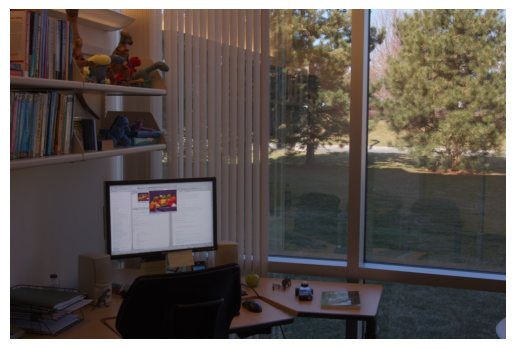

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(np.clip(img/255.0, 0, 1))
    plt.axis('off')
    plt.show()

def readImagesAndTimes():
    times = np.array([0.0333, 0.1, 0.3333, 0.625, 1.3, 4], dtype=np.float32)

    images = []
    for i in range(len(times)):
        im = cv2.imread(f"office_{i+1}.jpg")
        images.append(im)

    return images, times

images, times = readImagesAndTimes()

mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0, 0, 0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2_imshow(ldrReinhard * 255)
